# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [152]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load dataset
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

# Separate features and target variable
X_train = dataset_train.iloc[:, 2:-1].values  # Exclude 'Booking_ID' and 'booking_status'
y_train = dataset_train.iloc[:, -1].values    # 'booking_status'

X_test = dataset_test.iloc[:, 2:-1].values  # Exclude 'Booking_ID' and 'booking_status'
y_test = dataset_test.iloc[:, -1].values    # 'booking_status'

# Define a single ColumnTransformer for all categorical columns
ct = ColumnTransformer(transformers=[
    ('Gender', OneHotEncoder(), [0]), 
    ('Customer', OneHotEncoder(), [1]),    
    ('Type Of Travel', OneHotEncoder(), [3]),
     ('Class', OneHotEncoder(), [4]) 
], remainder='passthrough')

# Apply transformations
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

# Handle missing values by imputing them
imputer = SimpleImputer(strategy='mean')  # or 'median'/'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## Splitting the dataset into the Training set and Test set

In [154]:
 #from sklearn.model_selection import train_test_split
 #X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)

In [155]:
print(X_train)

[[ 0.  1.  1. ...  5. 25. 18.]
 [ 0.  1.  0. ...  1.  1.  6.]
 [ 1.  0.  1. ...  5.  0.  0.]
 ...
 [ 0.  1.  0. ...  4.  7. 14.]
 [ 1.  0.  0. ...  1.  0.  0.]
 [ 0.  1.  1. ...  1.  0.  0.]]


In [159]:
print(y_train)

[0 0 1 ... 0 0 0]


In [161]:
print(X_test)

[[ 1.  0.  1. ...  5. 50. 44.]
 [ 1.  0.  1. ...  5.  0.  0.]
 [ 0.  1.  0. ...  2.  0.  0.]
 ...
 [ 1.  0.  1. ...  2.  0.  0.]
 [ 0.  1.  1. ...  4.  0.  0.]
 [ 1.  0.  1. ...  1.  0.  0.]]


In [163]:
print(y_test)

[1 1 0 ... 0 1 0]


## Feature Scaling

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [168]:
print(X_train)

[[-1.01503056  1.01503056  0.4727667  ...  1.30586973  0.26639265
   0.07301421]
 [-1.01503056  1.01503056 -2.11520819 ... -1.74229153 -0.36137482
  -0.23753899]
 [ 0.98519201 -0.98519201  0.4727667  ...  1.30586973 -0.3875318
  -0.39281559]
 ...
 [-1.01503056  1.01503056 -2.11520819 ...  0.54382941 -0.20443295
  -0.03050353]
 [ 0.98519201 -0.98519201 -2.11520819 ... -1.74229153 -0.3875318
  -0.39281559]
 [-1.01503056  1.01503056  0.4727667  ... -1.74229153 -0.3875318
  -0.39281559]]


In [170]:
print(X_test)

[[ 0.98519201 -0.98519201  0.4727667  ...  1.30586973  0.92031709
   0.74587946]
 [ 0.98519201 -0.98519201  0.4727667  ...  1.30586973 -0.3875318
  -0.39281559]
 [-1.01503056  1.01503056 -2.11520819 ... -0.98025121 -0.3875318
  -0.39281559]
 ...
 [ 0.98519201 -0.98519201  0.4727667  ... -0.98025121 -0.3875318
  -0.39281559]
 [-1.01503056  1.01503056  0.4727667  ...  0.54382941 -0.3875318
  -0.39281559]
 [ 0.98519201 -0.98519201  0.4727667  ... -1.74229153 -0.3875318
  -0.39281559]]


## Training the K-NN model on the Training set

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_scores = []

for n in range(1, 11): 
    classifier = KNeighborsClassifier(n_neighbors=n, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for n_neighbors={n}: {accuracy:.4f}")

best_n_neighbors = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Best n_neighbors: {best_n_neighbors}")

classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

Accuracy for n_neighbors=1: 0.9154
Accuracy for n_neighbors=2: 0.9104
Accuracy for n_neighbors=3: 0.9243
Accuracy for n_neighbors=4: 0.9192
Accuracy for n_neighbors=5: 0.9266
Accuracy for n_neighbors=6: 0.9229
Accuracy for n_neighbors=7: 0.9275
Accuracy for n_neighbors=8: 0.9237
Accuracy for n_neighbors=9: 0.9272
Accuracy for n_neighbors=10: 0.9238
Best n_neighbors: 7


KNeighborsClassifier(n_neighbors=7)

## Predicting a new result

In [176]:
# Prepare your new input
input1 = [["Male", "disloyal Customer", 22, "Personal Travel", "Eco", 596, 0, 5, 5, 4, 1, 4, 3, 3, 1, 5, 4, 4, 3, 4, 10, 26]]

input2 = [["Male", "disloyal Customer", 22, "Personal Travel", "Eco", 596, 5, 5, 5, 4, 1, 4, 3, 3, 1, 5, 4, 4, 3, 4, 80, 200]]

# Transform the new input using the previously fit ColumnTransformer
input1_transformed = ct.transform(input1)  # Use transform instead of fit_transform

# Transform the new input using the previously fit ColumnTransformer
input2_transformed = ct.transform(input2)  # Use transform instead of fit_transform

# Make a prediction for input1
prediction1 = classifier.predict(input1_transformed)

# Make a prediction for input2
prediction2 = classifier.predict(input2_transformed)

# Print the prediction for input1
print(prediction1)

# Print the prediction for input2
print(prediction2)
# Prepare your new input
input3 = [["Female", "Loyal Customer", 35, "Business travel", "Business", 450, 4, 5, 5, 4, 3, 4, 3, 5, 4, 5, 4, 4, 5, 4, 10, 15]]

# Transform the new input using the previously fit ColumnTransformer
input3_transformed = ct.transform(input3)  # Use transform instead of fit_transform

# Make a prediction for input1
prediction3 = classifier.predict(input_transformed)

# Print the prediction for input3
print(prediction3)

[1]
[0]
[1]


## Predicting the Test set results

In [179]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

[[14065   508]
 [ 1376 10027]]


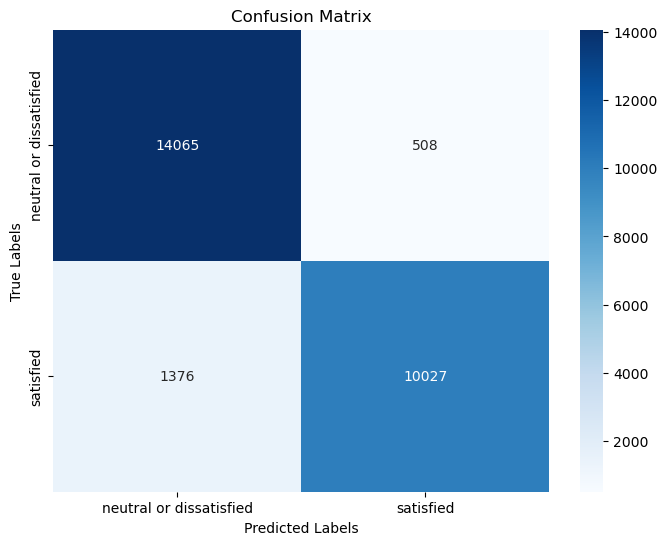

Accuracy Score: 0.93


In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')